# Jason Samuel Suwito

## Research question/interests

#### UPDATED: To what extent does the correlation exist between BMI, Health Care Cost, and Work Hours per week?
I will create a pair plot for the three relationships: BMI vs Health Care Cost, BMI vs Work Hours per Week, and Health Care Cost vs Work Hours per Week. For each of the relationships, I will analyze the correlation coefficient value to see the level of correlation between the independent and dependent variables. A high correlation coefficient will indicate that there is a strong relationship between the independent and dependent variables while a low correlation coefficient value will indicate that the relationship is weak. 

#### UPDATED How does age and sex is distributed in each BMI Classifications?
For this question, I will create a violin plot with the x-axis representing the BMI Classification and the y-axis representing age. Each violin plot will be splitted into two, the first part for Male and the second part for Female. Using this plot, it is possible to see the distribution of age and sex in each BMI classification.

## Data Analysis Pipeline
1. Data Import / Loading
    * Check file types
    * Check delimiters 
    * Check the column names and its purpose
2. Data Cleaning
    * Drop columns that are not relevant to the investigation
    * Drop rows that have missing values (using `dropna()`)
3. Data Processing
    * RQ1:
        * Create a new sub-dataset based on grouping the `age` variable.
        * The `groupby` process should take the mean of other quantitative variables aside from the `age` variable.
        * Deal with outliers
    * RQ2:
        * Create a new text column based on classifying the BMI values based on a specified range of values (`bins`).
        * Create a new numerical column based on classifying the BMI values based on a specified range of values (`bins`).
        * Deal with outliers
4. Data Wrangling
    * RQ1:
        * Merge the all the datasets together into one big dataset consisting of the `bmi`, `charges`, and `hours.per.week` based on age.
    * Restructure data formats 

## Data Import

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions2
else:
    import sys
    sys.path.append("./code")
    import project_functions2

### RQ1: To what extent does the correlation exist between BMI, Health Care Cost, and Work Hours per week?

In [20]:
health = project_functions2.load_process_clean_medical_no_sex("../data/raw/medical_expense.csv")
health1 = project_functions2.wrangle_medical(health)
income = project_functions2.load_process_clean_income("../data/raw/adult_income.csv")
income1 = project_functions2.wrangle_income(income)
RQ1 = pd.merge(health1, income1, how='inner', on='Age')
BMIvsCost_coeff = RQ1['BMI'].corr(RQ1['Average Cost'])
print("Correlation Coefficient of Average BMI vs Average Healthcare Cost = ", BMIvsCost_coeff)
BMIvsHours_coeff = RQ1['BMI'].corr(RQ1['Working Hours per Week'])
print("Correlation Coefficient of Average BMI vs Average Working Hours per Week = ", BMIvsHours_coeff)
CostvsHours_coeff = RQ1['Average Cost'].corr(RQ1['Working Hours per Week'])
print("Correlation Coefficient of Average Healthcare Cost vs Average Working Hours per Week = ", CostvsHours_coeff)

Correlation Coefficient of Average BMI vs Average Healthcare Cost =  0.5890469620333684
Correlation Coefficient of Average BMI vs Average Working Hours per Week =  0.006338974388002727
Correlation Coefficient of Average Healthcare Cost vs Average Working Hours per Week =  0.20287856564505546


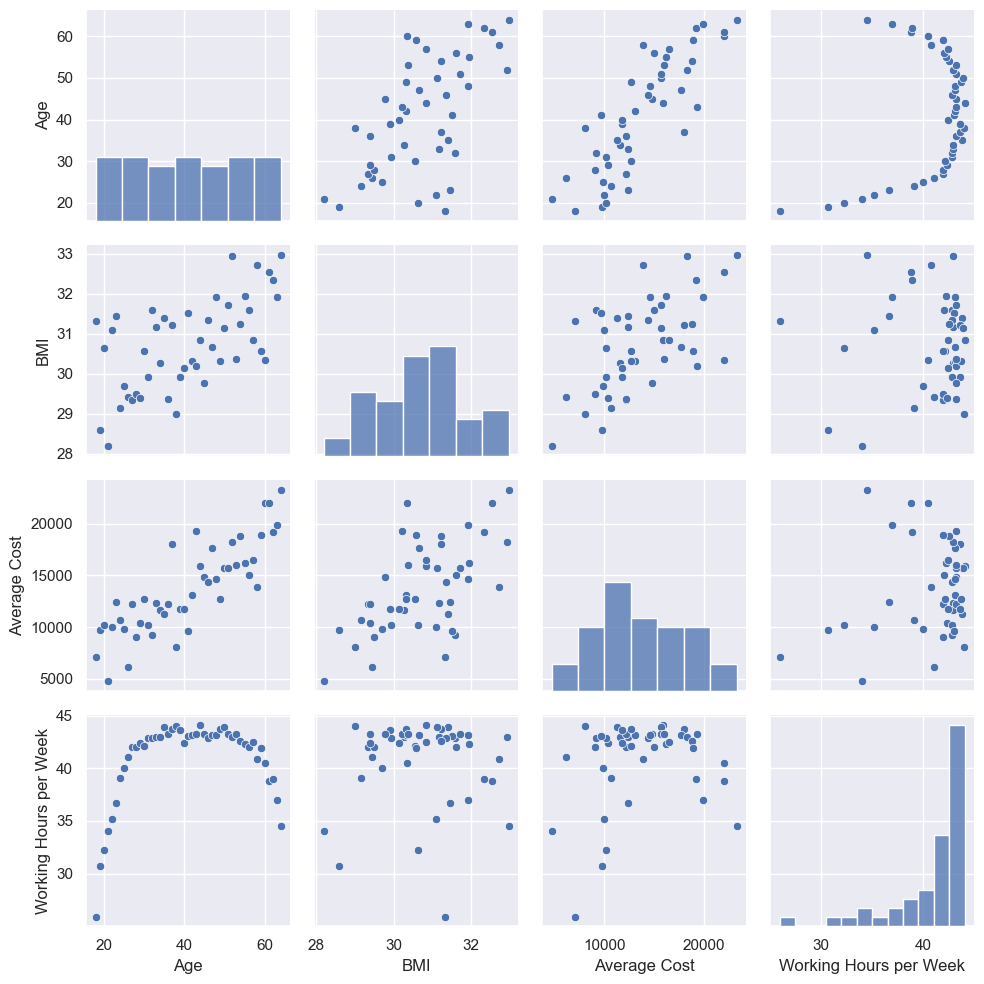

In [21]:
p1 = sns.pairplot(RQ1)
plt.tight_layout()
plt.show()

### RQ2: To what extent does age correlates to BMI?

In [22]:
health = project_functions2.load_process_clean_medical("../data/raw/medical_expense.csv")
health1 = project_functions2.categorize_bmi(health)

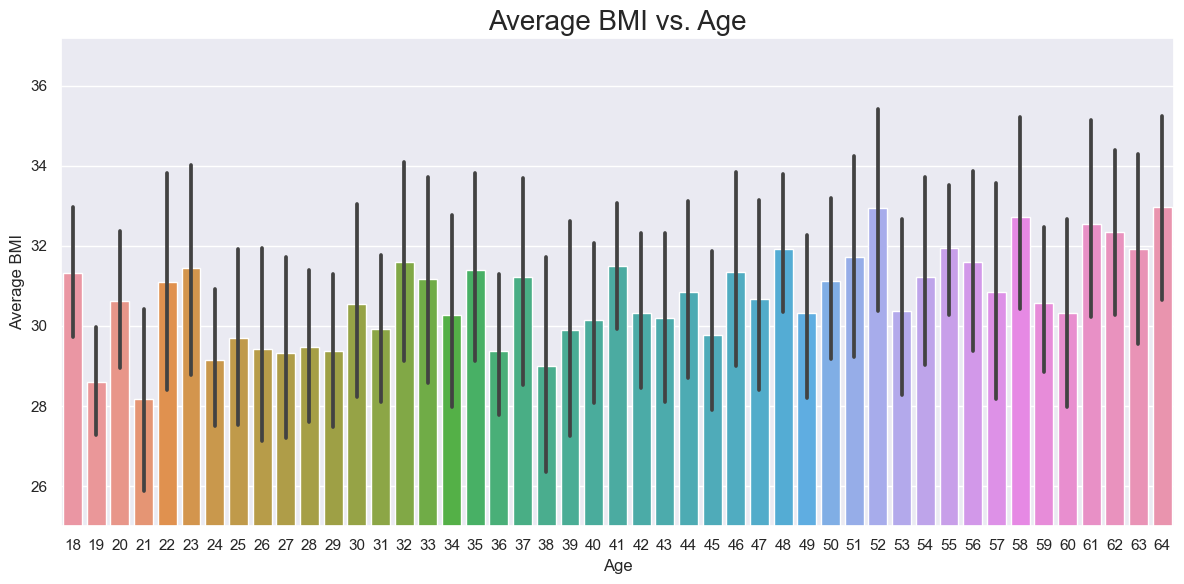

In [23]:
sns.set(rc={'figure.figsize':(12,6)})
p2 = sns.barplot(data=health1, x='age', y='bmi')
p2.set_title("Average BMI vs. Age", size = 20)
p2.set_ylabel("Average BMI")
p2.set_xlabel("Age")
p2.set(ylim=(25, None))
plt.tight_layout()
plt.show()

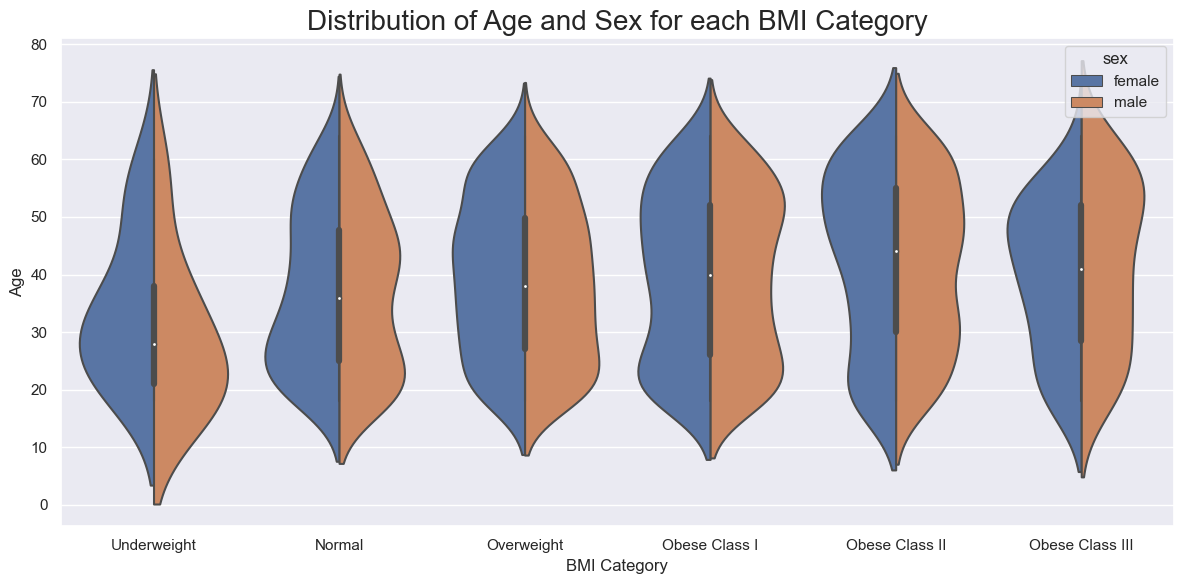

In [24]:
p3 = sns.violinplot(data=health1, x='BMI_cat', y='age', hue='sex', split=True)
p3.set_title("Distribution of Age and Sex for each BMI Category", size = 20)
p3.set_ylabel("Age")
p3.set_xlabel("BMI Category")
plt.tight_layout()
plt.show()

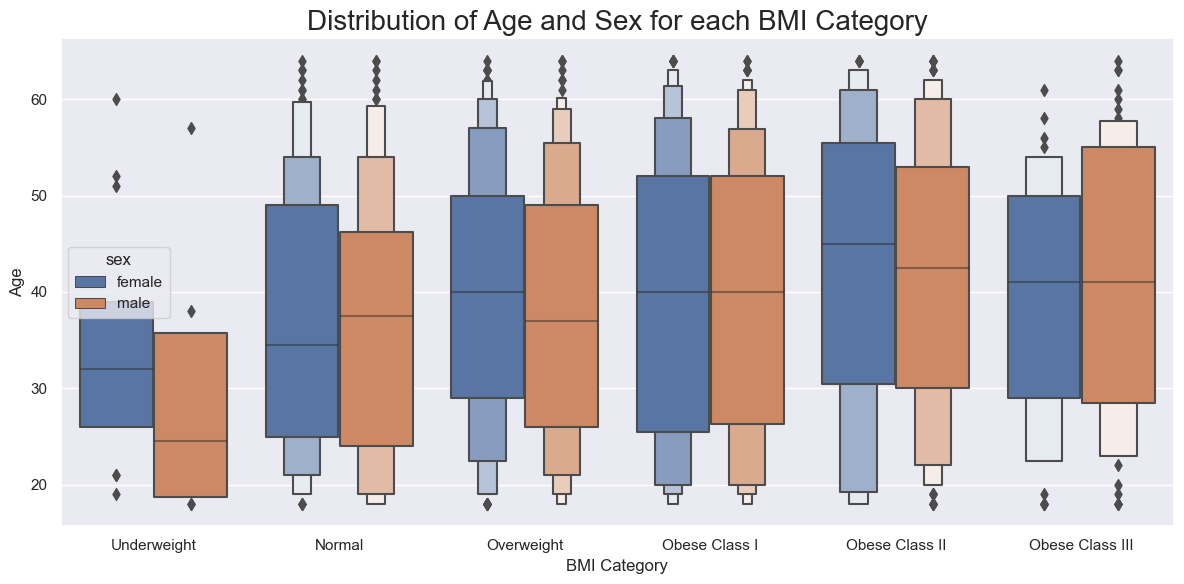

In [25]:
p4 = sns.boxenplot(data=health1, x='BMI_cat', y='age', hue='sex')
p4.set_title("Distribution of Age and Sex for each BMI Category", size = 20)
p4.set_ylabel("Age")
p4.set_xlabel("BMI Category")
plt.tight_layout()
plt.show()